# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat
import pickle

# Loading data and selecting features

In [2]:
loan_data_inputs_train = pd.read_csv('data/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('data/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('data/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('data/loan_data_targets_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti 22.4-35,dti >35,mths_since_last_record_factor,mths_since_last_record Missing,mths_since_last_record 0-2,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
464103,4545797,5798012,18000,18000,18000.0,36 months,9.67,578.03,B,B1,...,0,0,NaN,1,0,0,0,0,0,0
449524,11455994,13388159,25000,25000,24925.0,60 months,14.98,594.49,C,C3,...,0,0,NaN,1,0,0,0,0,0,0
37592,379025,404949,15000,15000,13975.0,36 months,9.63,481.42,A,A5,...,0,0,NaN,1,0,0,0,0,0,0
49075,9785537,11637587,8400,8400,8400.0,36 months,12.85,282.43,B,B4,...,1,0,NaN,1,0,0,0,0,0,0
79488,7728332,9429912,16550,16550,16500.0,36 months,8.60,523.21,A,A4,...,1,0,NaN,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
464103,1
449524,1
37592,1
49075,1
79488,1


In [5]:
loan_data_inputs_train.shape

(349713, 307)

In [6]:
loan_data_targets_train.shape

(349713, 1)

In [7]:
loan_data_inputs_test.shape

(116572, 307)

In [8]:
loan_data_targets_test.shape

(116572, 1)

## Feature selection 

In [9]:
loan_data_inputs_train.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'to

In [10]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade A',
'grade B',
'grade C',
'grade D',
'grade E',
'grade F',
'grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'home_ownership OWN',
'home_ownership MORTGAGE',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'addr_state NM_VA',
'addr_state NY',
'addr_state OK_TN_MO_LA_MD_NC',
'addr_state CA',
'addr_state UT_KY_AZ_NJ',
'addr_state AR_MI_PA_OH_MN',
'addr_state RI_MA_DE_SD_IN',
'addr_state GA_WA_OR',
'addr_state WI_MT',
'addr_state TX',
'addr_state IL_CT',
'addr_state KS_SC_CO_VT_AK_MS',
'addr_state WV_NH_WY_DC_ME_ID',
'verification_status Not Verified',
'verification_status Source Verified',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'purpose credit_card',
'purpose debt_consolidation',
'purpose oth__med__vacation',
'purpose major_purch__car__home_impr',
'initial_list_status f',
'initial_list_status w',
'term 36',
'term 60',
'emp_length 0',
'emp_length 1',
'emp_length 2-4',
'emp_length 5-6',
'emp_length 7-9',
'emp_length 10',
'mths_issue_d <38',
'mths_issue_d 38-39',
'mths_issue_d 40-41',
'mths_issue_d 42-48',
'mths_issue_d 49-52',
'mths_issue_d 53-64',
'mths_issue_d 65-84',
'mths_issue_d >84',
'int_rate <9.548',
'int_rate 9.548-12.025',
'int_rate 12.025-15.74',
'int_rate 15.74-20.281',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'mths_since_earliest_cr_line 141-164',
'mths_since_earliest_cr_line 165-247',
'mths_since_earliest_cr_line 248-270',
'mths_since_earliest_cr_line 271-352',
'mths_since_earliest_cr_line >352',
'delinq_2yrs 0',
'delinq_2yrs 1-3',
'delinq_2yrs >=4',
'inq_last_6mths 0',
'inq_last_6mths 1-2',
'inq_last_6mths 3-6',
'inq_last_6mths >6',
'open_acc 0',
'open_acc 1-3',
'open_acc 4-12',
'open_acc 13-17',
'open_acc 18-22',
'open_acc 23-25',
'open_acc 26-30',
'open_acc >=31',
'pub_rec 0-2',
'pub_rec 3-4',
'pub_rec >=5',
'total_acc <=27',
'total_acc 28-51',
'total_acc >=52',
'acc_now_delinq 0',
'acc_now_delinq >=1',
'total_rev_hi_lim <=5K',
'total_rev_hi_lim 5K-10K',
'total_rev_hi_lim 10K-20K',
'total_rev_hi_lim 20K-30K',
'total_rev_hi_lim 30K-40K',
'total_rev_hi_lim 40K-55K',
'total_rev_hi_lim 55K-95K',
'total_rev_hi_lim >95K',
'annual_inc <20K',
'annual_inc 20K-30K',
'annual_inc 30K-40K',
'annual_inc 40K-50K',
'annual_inc 50K-60K',
'annual_inc 60K-70K',
'annual_inc 70K-80K',
'annual_inc 80K-90K',
'annual_inc 90K-100K',
'annual_inc 100K-120K',
'annual_inc 120K-140K',
'annual_inc >140K',
'dti <=1.4',
'dti 1.4-3.5',
'dti 3.5-7.7',
'dti 7.7-10.5',
'dti 10.5-16.1',
'dti 16.1-20.3',
'dti 20.3-21.7',
'dti 21.7-22.4',
'dti 22.4-35',
'dti >35',
'mths_since_last_delinq Missing',
'mths_since_last_delinq 0-3',
'mths_since_last_delinq 4-30',
'mths_since_last_delinq 31-56',
'mths_since_last_delinq >=57',
'mths_since_last_record Missing',
'mths_since_last_record 0-2',
'mths_since_last_record 3-20',
'mths_since_last_record 21-31',
'mths_since_last_record 32-80',
'mths_since_last_record 81-86',
'mths_since_last_record >=86']]

In [11]:
ref_categories = ['grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status f',
'term 60',
'emp_length 0',
'mths_issue_d >84',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'delinq_2yrs >=4',
'inq_last_6mths >6',
'open_acc 0',
'pub_rec 0-2',
'total_acc <=27',
'acc_now_delinq 0',
'total_rev_hi_lim <=5K',
'annual_inc <20K',
'dti >35',
'mths_since_last_delinq 0-3',
'mths_since_last_record 0-2']

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade A,grade B,grade C,grade D,grade E,grade F,home_ownership OWN,home_ownership MORTGAGE,addr_state NM_VA,addr_state NY,...,mths_since_last_delinq Missing,mths_since_last_delinq 4-30,mths_since_last_delinq 31-56,mths_since_last_delinq >=57,mths_since_last_record Missing,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
464103,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
449524,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
37592,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
49075,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
79488,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


# PD Model

## Logistic regression

In [13]:
reg = LogisticRegression()

In [14]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
reg.intercept_

array([-1.42095232])

In [16]:
reg.coef_

array([[ 1.05744283e+00,  8.72729275e-01,  6.69917198e-01,
         4.87863935e-01,  3.28445386e-01,  1.79647448e-01,
         8.86003502e-02,  1.06114034e-01,  9.74226656e-02,
         8.04518542e-02,  1.05756315e-01,  9.74465358e-02,
         1.12116654e-01,  1.77411600e-01,  1.17715380e-01,
         2.36167386e-01,  2.85107251e-01,  2.73120322e-01,
         3.06735385e-01,  3.44160370e-01,  5.42468898e-01,
         9.08086940e-02, -1.72604403e-02,  3.24025024e-01,
         1.99150794e-01,  2.11760887e-01,  3.00764240e-01,
         5.07024541e-02,  7.60117318e-02,  1.23419737e-01,
         1.37186889e-01,  8.44727882e-02,  7.54387165e-02,
         1.36588462e-01,  1.12031731e+00,  9.00684312e-01,
         7.97531011e-01,  5.81380035e-01,  4.46576224e-01,
         1.88868863e-01, -7.47042743e-02,  9.78841803e-01,
         5.87704090e-01,  3.44563283e-01,  1.34493415e-01,
         6.69799555e-02,  4.50215402e-02,  7.10897688e-02,
         1.16411944e-01,  1.36225593e-01,  3.29966473e-0

In [17]:
feature_name = inputs_train.columns.values

In [18]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.420952
1,grade A,1.057443
2,grade B,0.872729
3,grade C,0.669917
4,grade D,0.487864
...,...,...
100,mths_since_last_record 3-20,0.327152
101,mths_since_last_record 21-31,0.264745
102,mths_since_last_record 32-80,0.465088
103,mths_since_last_record 81-86,0.144349


## Logistic regression Model with P-Values

In [19]:
class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [20]:
reg = LogisticRegression_with_p_values()

In [21]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.420952
1,grade A,1.057443
2,grade B,0.872729
3,grade C,0.669917
4,grade D,0.487864
...,...,...
100,mths_since_last_record 3-20,0.327152
101,mths_since_last_record 21-31,0.264745
102,mths_since_last_record 32-80,0.465088
103,mths_since_last_record 81-86,0.144349


In [23]:
p_values = reg.p_values

In [24]:
p_values = np.append(np.nan, np.array(p_values)) #There is no p-value for Intercept

In [25]:
pd.options.display.max_rows = None
summary_table['p_values'] = p_values
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.42095232,nan
1,grade A,1.05744283,0.00000000
2,grade B,0.87272927,0.00000000
3,grade C,0.66991720,0.00000000
4,grade D,0.48786393,0.00000000
5,grade E,0.32844539,0.00000000
6,grade F,0.17964745,0.00054386
7,home_ownership OWN,0.08860035,0.00002143
8,home_ownership MORTGAGE,0.10611403,0.00000000
9,addr_state NM_VA,0.09742267,0.00347148


If p-value is below 0.05 we keep the variables. i.s. the coefficient of the Variable is statistically significant

For the Final model we remove the following variables as the p-values show these are not useful to keep:

1. delinq_2yrs
2. open_acc
3. pub_rec
4. total_rev_hi_lim
5. total_acc

Keep in mind that p-values are really helpful to select Variables altough there is no fine line here. For example "verification_status Source Verified" is not significant statistically, but we will keep it as the other pair "verification_status Not Verified" is significant. 

In [26]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade A',
'grade B',
'grade C',
'grade D',
'grade E',
'grade F',
'grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'home_ownership OWN',
'home_ownership MORTGAGE',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'addr_state NM_VA',
'addr_state NY',
'addr_state OK_TN_MO_LA_MD_NC',
'addr_state CA',
'addr_state UT_KY_AZ_NJ',
'addr_state AR_MI_PA_OH_MN',
'addr_state RI_MA_DE_SD_IN',
'addr_state GA_WA_OR',
'addr_state WI_MT',
'addr_state TX',
'addr_state IL_CT',
'addr_state KS_SC_CO_VT_AK_MS',
'addr_state WV_NH_WY_DC_ME_ID',
'verification_status Not Verified',
'verification_status Source Verified',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'purpose credit_card',
'purpose debt_consolidation',
'purpose oth__med__vacation',
'purpose major_purch__car__home_impr',
'initial_list_status f',
'initial_list_status w',
'term 36',
'term 60',
'emp_length 0',
'emp_length 1',
'emp_length 2-4',
'emp_length 5-6',
'emp_length 7-9',
'emp_length 10',
'mths_issue_d <38',
'mths_issue_d 38-39',
'mths_issue_d 40-41',
'mths_issue_d 42-48',
'mths_issue_d 49-52',
'mths_issue_d 53-64',
'mths_issue_d 65-84',
'mths_issue_d >84',
'int_rate <9.548',
'int_rate 9.548-12.025',
'int_rate 12.025-15.74',
'int_rate 15.74-20.281',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'mths_since_earliest_cr_line 141-164',
'mths_since_earliest_cr_line 165-247',
'mths_since_earliest_cr_line 248-270',
'mths_since_earliest_cr_line 271-352',
'mths_since_earliest_cr_line >352',
'inq_last_6mths 0',
'inq_last_6mths 1-2',
'inq_last_6mths 3-6',
'inq_last_6mths >6',
'acc_now_delinq 0',
'acc_now_delinq >=1',
'annual_inc <20K',
'annual_inc 20K-30K',
'annual_inc 30K-40K',
'annual_inc 40K-50K',
'annual_inc 50K-60K',
'annual_inc 60K-70K',
'annual_inc 70K-80K',
'annual_inc 80K-90K',
'annual_inc 90K-100K',
'annual_inc 100K-120K',
'annual_inc 120K-140K',
'annual_inc >140K',
'dti <=1.4',
'dti 1.4-3.5',
'dti 3.5-7.7',
'dti 7.7-10.5',
'dti 10.5-16.1',
'dti 16.1-20.3',
'dti 20.3-21.7',
'dti 21.7-22.4',
'dti 22.4-35',
'dti >35',
'mths_since_last_delinq Missing',
'mths_since_last_delinq 0-3',
'mths_since_last_delinq 4-30',
'mths_since_last_delinq 31-56',
'mths_since_last_delinq >=57',
'mths_since_last_record Missing',
'mths_since_last_record 0-2',
'mths_since_last_record 3-20',
'mths_since_last_record 21-31',
'mths_since_last_record 32-80',
'mths_since_last_record 81-86',
'mths_since_last_record >=86']]

In [27]:
ref_categories = ['grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status f',
'term 60',
'emp_length 0',
'mths_issue_d >84',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'inq_last_6mths >6',
'acc_now_delinq 0',
'annual_inc <20K',
'dti >35',
'mths_since_last_delinq 0-3',
'mths_since_last_record 0-2']

In [28]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade A,grade B,grade C,grade D,grade E,grade F,home_ownership OWN,home_ownership MORTGAGE,addr_state NM_VA,addr_state NY,...,mths_since_last_delinq Missing,mths_since_last_delinq 4-30,mths_since_last_delinq 31-56,mths_since_last_delinq >=57,mths_since_last_record Missing,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
464103,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
449524,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
37592,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
49075,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
79488,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [29]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/graystone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
feature_name = inputs_train.columns.values

In [31]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
pd.set_option('display.float_format', lambda x: '%.8f' % x)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.52513653,nan
1,grade A,1.05598978,0.00000000
2,grade B,0.86837785,0.00000000
3,grade C,0.66554874,0.00000000
4,grade D,0.48467673,0.00000000
5,grade E,0.32560392,0.00000000
6,grade F,0.17723386,0.00048065
7,home_ownership OWN,0.08991479,0.00001553
8,home_ownership MORTGAGE,0.10517816,0.00000000
9,addr_state NM_VA,0.09686866,0.00362032


# Model Validation (with test data)

## Out-of-sample validation (test)

In [32]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade A',
'grade B',
'grade C',
'grade D',
'grade E',
'grade F',
'grade G',
'home_ownership RENT_OTHER_NONE_ANY',
'home_ownership OWN',
'home_ownership MORTGAGE',
'addr_state ND_NE_IA_NV_FL_HI_AL',
'addr_state NM_VA',
'addr_state NY',
'addr_state OK_TN_MO_LA_MD_NC',
'addr_state CA',
'addr_state UT_KY_AZ_NJ',
'addr_state AR_MI_PA_OH_MN',
'addr_state RI_MA_DE_SD_IN',
'addr_state GA_WA_OR',
'addr_state WI_MT',
'addr_state TX',
'addr_state IL_CT',
'addr_state KS_SC_CO_VT_AK_MS',
'addr_state WV_NH_WY_DC_ME_ID',
'verification_status Not Verified',
'verification_status Source Verified',
'verification_status Verified',
'purpose educ__sm_b__wedd__ren_en__mov__house',
'purpose credit_card',
'purpose debt_consolidation',
'purpose oth__med__vacation',
'purpose major_purch__car__home_impr',
'initial_list_status f',
'initial_list_status w',
'term 36',
'term 60',
'emp_length 0',
'emp_length 1',
'emp_length 2-4',
'emp_length 5-6',
'emp_length 7-9',
'emp_length 10',
'mths_issue_d <38',
'mths_issue_d 38-39',
'mths_issue_d 40-41',
'mths_issue_d 42-48',
'mths_issue_d 49-52',
'mths_issue_d 53-64',
'mths_issue_d 65-84',
'mths_issue_d >84',
'int_rate <9.548',
'int_rate 9.548-12.025',
'int_rate 12.025-15.74',
'int_rate 15.74-20.281',
'int_rate >20.281',
'mths_since_earliest_cr_line <140',
'mths_since_earliest_cr_line 141-164',
'mths_since_earliest_cr_line 165-247',
'mths_since_earliest_cr_line 248-270',
'mths_since_earliest_cr_line 271-352',
'mths_since_earliest_cr_line >352',
'inq_last_6mths 0',
'inq_last_6mths 1-2',
'inq_last_6mths 3-6',
'inq_last_6mths >6',
'acc_now_delinq 0',
'acc_now_delinq >=1',
'annual_inc <20K',
'annual_inc 20K-30K',
'annual_inc 30K-40K',
'annual_inc 40K-50K',
'annual_inc 50K-60K',
'annual_inc 60K-70K',
'annual_inc 70K-80K',
'annual_inc 80K-90K',
'annual_inc 90K-100K',
'annual_inc 100K-120K',
'annual_inc 120K-140K',
'annual_inc >140K',
'dti <=1.4',
'dti 1.4-3.5',
'dti 3.5-7.7',
'dti 7.7-10.5',
'dti 10.5-16.1',
'dti 16.1-20.3',
'dti 20.3-21.7',
'dti 21.7-22.4',
'dti 22.4-35',
'dti >35',
'mths_since_last_delinq Missing',
'mths_since_last_delinq 0-3',
'mths_since_last_delinq 4-30',
'mths_since_last_delinq 31-56',
'mths_since_last_delinq >=57',
'mths_since_last_record Missing',
'mths_since_last_record 0-2',
'mths_since_last_record 3-20',
'mths_since_last_record 21-31',
'mths_since_last_record 32-80',
'mths_since_last_record 81-86',
'mths_since_last_record >=86']]

In [33]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade A,grade B,grade C,grade D,grade E,grade F,home_ownership OWN,home_ownership MORTGAGE,addr_state NM_VA,addr_state NY,...,mths_since_last_delinq Missing,mths_since_last_delinq 4-30,mths_since_last_delinq 31-56,mths_since_last_delinq >=57,mths_since_last_record Missing,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
298334,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
399953,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
182770,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
211312,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
256753,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [34]:
y_hat_test = reg2.model.predict(inputs_test)

In [35]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.11133552, 0.88866448],
       [0.08536819, 0.91463181],
       [0.12206451, 0.87793549],
       ...,
       [0.19908893, 0.80091107],
       [0.08923748, 0.91076252],
       [0.07129848, 0.92870152]])

In [37]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1] # we only need the second column
y_hat_test_proba

array([0.88866448, 0.91463181, 0.87793549, ..., 0.80091107, 0.91076252,
       0.92870152])

In [38]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.shape

(116572, 2)

In [39]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [40]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [41]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
298334,1,0.88866448
399953,1,0.91463181
182770,0,0.87793549
211312,1,0.92577491
256753,1,0.96538153


## Accuracy and Area under the Curve

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
threshold = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > threshold, 1, 0)

Confusion matrix

In [44]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,9130,3785
1,44104,59553


In [45]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.07832069,0.03246920
1,0.37834128,0.51086882


In [46]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5891895137768932

In [47]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

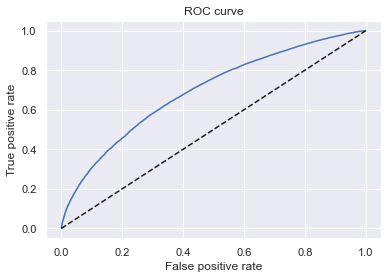

In [48]:
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, false_positive_rate, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Area under the curve

In [49]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6940164592019666

General guidance to read AUROC (in %)

* 90-1 = excellent (A)
* 80-90 = good (B)
* 70-80 = fair (C)
* 60-70 = poor (D)
* 0-60 = fail (F)

Our model is Fair at best! That is why banks building more than one model to make sure they have the best at the end

### Gini and Kolmogorov-Smirnov

#### Gini Coefficient

A Gini coefficient can be used to evaluate the performance of a classifier, such as a PD model.
In the consumer finance industry, Gini can assess the accuracy of a prediction around whether a loan applicant will repay or default.

Gini is measured in values between 0 and 1, where a score of 1 means that the model is 100% accurate in predicting the outcome. A score of 1 only exists in theory. In practice, the closer the Gini is to 1, the better. Whereas, a Gini score equal to 0 means the model is entirely inaccurate. To achieve a score of 0, the model would have to ascribe random values to every prediction.

A higher Gini is beneficial to the bottom line because requests can be assessed more accurately, which means acceptance can be increased and at less risk.

Formula

$$Gini= AUROC * 2 -1 $$


$$AUROC= \frac {Gini +1} {1} $$

In [50]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [51]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
41422,0,0.35775752,0
39932,0,0.36719313,0
41048,1,0.39486419,0
42026,1,0.42754482,0
42368,0,0.43851306,0


In [52]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [53]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,41422,0,0.35775752,0
1,39932,0,0.36719313,0
2,41048,1,0.39486419,0
3,42026,1,0.42754482,0
4,42368,0,0.43851306,0


In [54]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [55]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,41422,0,0.35775752,0,1,0,1
1,39932,0,0.36719313,0,2,0,2
2,41048,1,0.39486419,0,3,1,2
3,42026,1,0.42754482,0,4,2,2
4,42368,0,0.43851306,0,5,2,3


In [56]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [57]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,41422,0,0.35775752,0,1,0,1,0.00000858,0.00000000,0.00007743
1,39932,0,0.36719313,0,2,0,2,0.00001716,0.00000000,0.00015486
2,41048,1,0.39486419,0,3,1,2,0.00002574,0.00000965,0.00015486
3,42026,1,0.42754482,0,4,2,2,0.00003431,0.00001929,0.00015486
4,42368,0,0.43851306,0,5,2,3,0.00004289,0.00001929,0.00023229


Text(0.5, 1.0, 'Gini coefficient')

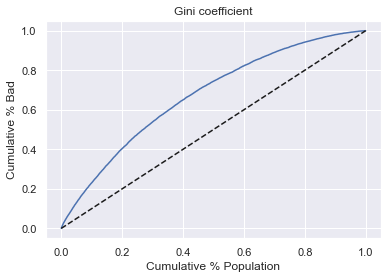

In [58]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini coefficient')

In [59]:
Gini = AUROC *2-1
Gini

0.3880329184039333

#### Kolmogorov-Smirnov Test

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous, purely discrete or mixed). In the two-sample case, the distribution considered under the null hypothesis is a continuous distribution but is otherwise unrestricted.

![title](pics/KS_wikipedia.png)

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

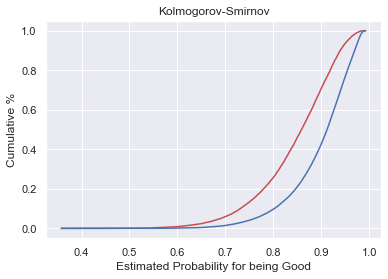

In [60]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

__Higher value is better__

In [61]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.283050128201527

# Apply the PD model

## Scorecard

In [62]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.52513653,nan
1,grade A,1.05598978,0.00000000
2,grade B,0.86837785,0.00000000
3,grade C,0.66554874,0.00000000
4,grade D,0.48467673,0.00000000
5,grade E,0.32560392,0.00000000
6,grade F,0.17723386,0.00048065
7,home_ownership OWN,0.08991479,0.00001553
8,home_ownership MORTGAGE,0.10517816,0.00000000
9,addr_state NM_VA,0.09686866,0.00362032


In [63]:
ref_categories

['grade G',
 'home_ownership RENT_OTHER_NONE_ANY',
 'addr_state ND_NE_IA_NV_FL_HI_AL',
 'verification_status Verified',
 'purpose educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status f',
 'term 60',
 'emp_length 0',
 'mths_issue_d >84',
 'int_rate >20.281',
 'mths_since_earliest_cr_line <140',
 'inq_last_6mths >6',
 'acc_now_delinq 0',
 'annual_inc <20K',
 'dti >35',
 'mths_since_last_delinq 0-3',
 'mths_since_last_record 0-2']

In [64]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade G,0,nan
1,home_ownership RENT_OTHER_NONE_ANY,0,nan
2,addr_state ND_NE_IA_NV_FL_HI_AL,0,nan
3,verification_status Verified,0,nan
4,purpose educ__sm_b__wedd__ren_en__mov__house,0,nan
5,initial_list_status f,0,nan
6,term 60,0,nan
7,emp_length 0,0,nan
8,mths_issue_d >84,0,nan
9,int_rate >20.281,0,nan


In [65]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.52513653,nan
1,1,grade A,1.05598978,0.00000000
2,2,grade B,0.86837785,0.00000000
3,3,grade C,0.66554874,0.00000000
4,4,grade D,0.48467673,0.00000000
5,5,grade E,0.32560392,0.00000000
6,6,grade F,0.17723386,0.00048065
7,7,home_ownership OWN,0.08991479,0.00001553
8,8,home_ownership MORTGAGE,0.10517816,0.00000000
9,9,addr_state NM_VA,0.09686866,0.00362032


In [66]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(' ').str[0]

In [67]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.52513653,nan,Intercept
1,1,grade A,1.05598978,0.00000000,grade
2,2,grade B,0.86837785,0.00000000,grade
3,3,grade C,0.66554874,0.00000000,grade
4,4,grade D,0.48467673,0.00000000,grade
5,5,grade E,0.32560392,0.00000000,grade
6,6,grade F,0.17723386,0.00048065,grade
7,7,home_ownership OWN,0.08991479,0.00001553,home_ownership
8,8,home_ownership MORTGAGE,0.10517816,0.00000000,home_ownership
9,9,addr_state NM_VA,0.09686866,0.00362032,addr_state


In [68]:
# inspired by the system in the States
min_score = 300
max_score = 850

In [69]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.6538024754792149

In [70]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.509886837220247

Scaling the scroes above

$$ variablescore = variable coef \frac{max score - min score} {max sum coef - min sum coef} $$ 

$$ intercept-score = \frac{intercept coef - min score} {max sum coef - min sum coef} (max score - min score) + min score $$ 

In [71]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# Also don't forget to adjust for Interecept (formula above)
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.52513653,nan,Intercept,309.87846712,310.00000000
1,1,grade A,1.05598978,0.00000000,grade,81.07475818,81.00000000
2,2,grade B,0.86837785,0.00000000,grade,66.67064889,67.00000000
3,3,grade C,0.66554874,0.00000000,grade,51.09822510,51.00000000
4,4,grade D,0.48467673,0.00000000,grade,37.21158054,37.00000000
5,5,grade E,0.32560392,0.00000000,grade,24.99859349,25.00000000
6,6,grade F,0.17723386,0.00048065,grade,13.60732169,14.00000000
7,7,home_ownership OWN,0.08991479,0.00001553,home_ownership,6.90330553,7.00000000
8,8,home_ownership MORTGAGE,0.10517816,0.00000000,home_ownership,8.07516725,8.00000000
9,9,addr_state NM_VA,0.09686866,0.00362032,addr_state,7.43719632,7.00000000


In [72]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [73]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max(). sum()
max_sum_score_prel

853.0

3 points higher than the maximum due to rounding, let's check where we did the greatest rounding

In [74]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard.sort_values('Difference')

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
59,59,annual_inc 60K-70K,0.26691479,0.00000000,annual_inc,20.49267193,20.00000000,-0.49267193
83,83,mths_since_last_record 81-86,0.13629288,0.13436057,mths_since_last_record,10.46403316,10.00000000,-0.46403316
43,43,int_rate 9.548-12.025,0.59205946,0.00000000,int_rate,45.45600606,45.00000000,-0.45600606
73,73,dti 21.7-22.4,0.08407264,0.21087255,dti,6.45476829,6.00000000,-0.45476829
84,84,mths_since_last_record >=86,0.20129543,0.01017213,mths_since_last_record,15.45467454,15.00000000,-0.45467454
9,9,addr_state NM_VA,0.09686866,0.00362032,addr_state,7.43719632,7.00000000,-0.43719632
30,30,emp_length 1,0.12290684,0.00000484,emp_length,9.43630542,9.00000000,-0.43630542
79,79,mths_since_last_record Missing,0.25311756,0.00092334,mths_since_last_record,19.43337493,19.00000000,-0.43337493
19,19,addr_state IL_CT,0.30480475,0.00000000,addr_state,23.40171459,23.00000000,-0.40171459
50,50,mths_since_earliest_cr_line >352,0.13541549,0.00000081,mths_since_earliest_cr_line,10.39667107,10.00000000,-0.39667107


In [75]:
df_scorecard.columns.values

array(['index', 'Feature name', 'Coefficients', 'p_values',
       'Original feature name', 'Score - Calculation',
       'Score - Preliminary', 'Difference'], dtype=object)

In [76]:
df_scorecard.sort_values('index')
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][45] = 10
df_scorecard['Score - Final'][53] = 32
df_scorecard['Score - Final'][32] = 6
df_scorecard

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.52513653,nan,Intercept,309.87846712,310.00000000,0.12153288,310.00000000
1,1,grade A,1.05598978,0.00000000,grade,81.07475818,81.00000000,-0.07475818,81.00000000
2,2,grade B,0.86837785,0.00000000,grade,66.67064889,67.00000000,0.32935111,67.00000000
3,3,grade C,0.66554874,0.00000000,grade,51.09822510,51.00000000,-0.09822510,51.00000000
4,4,grade D,0.48467673,0.00000000,grade,37.21158054,37.00000000,-0.21158054,37.00000000
5,5,grade E,0.32560392,0.00000000,grade,24.99859349,25.00000000,0.00140651,25.00000000
6,6,grade F,0.17723386,0.00048065,grade,13.60732169,14.00000000,0.39267831,14.00000000
7,7,home_ownership OWN,0.08991479,0.00001553,home_ownership,6.90330553,7.00000000,0.09669447,7.00000000
8,8,home_ownership MORTGAGE,0.10517816,0.00000000,home_ownership,8.07516725,8.00000000,-0.07516725,8.00000000
9,9,addr_state NM_VA,0.09686866,0.00362032,addr_state,7.43719632,7.00000000,-0.43719632,7.00000000


In [77]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [78]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max(). sum()
max_sum_score_prel

853.0

## Calculate the Credit Score

In [79]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [80]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [81]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade A,grade B,grade C,grade D,grade E,grade F,grade G,home_ownership RENT_OTHER_NONE_ANY,home_ownership OWN,...,mths_since_last_delinq 4-30,mths_since_last_delinq 31-56,mths_since_last_delinq >=57,mths_since_last_record Missing,mths_since_last_record 0-2,mths_since_last_record 3-20,mths_since_last_record 21-31,mths_since_last_record 32-80,mths_since_last_record 81-86,mths_since_last_record >=86
298334,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
399953,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
182770,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
211312,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
256753,1,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [82]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [83]:
scorecard_scores = df_scorecard['Score - Final']

In [84]:
inputs_test_with_ref_cat_w_intercept.shape

(116572, 102)

In [85]:
scorecard_scores.shape

(102,)

In [86]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [87]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [88]:
y_scores.head()

,0
298334,588.00000000
399953,610.00000000
182770,579.00000000
211312,623.00000000
256753,683.00000000


## PD

In [89]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [90]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
298334,0.89064688
399953,0.91559236
182770,0.87869627
211312,0.92779067
256753,0.96560123


## Setting Cut-off

In [91]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(false_positive_rate), pd.DataFrame(true_positive_rate)], axis = 1)
df_cutoffs.columns = ['Thresholds', 'False positive rate', 'True positive rate']

In [92]:
df_cutoffs.head()

,Thresholds,False positive rate,True positive rate
0,1.99284348,0.00000000,0.00000000
1,0.99284348,0.00000000,0.00000965
2,0.99155166,0.00000000,0.00005788
3,0.99148552,0.00007743,0.00005788
4,0.98976913,0.00007743,0.00059813


In [93]:
df_cutoffs['Thresholds'][0] = 1 - 1 / np.power(10, 16)

In [94]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['Thresholds'] / (1 - df_cutoffs['Thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs['Score'][0] = max_score

In [95]:
df_cutoffs.head()

,Thresholds,False positive rate,True positive rate,Score
0,1.00000000,0.00000000,0.00000000,850.00000000
1,0.99284348,0.00000000,0.00000965,806.00000000
2,0.99155166,0.00000000,0.00005788,793.00000000
3,0.99148552,0.00007743,0.00005788,792.00000000
4,0.98976913,0.00007743,0.00059813,778.00000000


In [96]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [97]:
df_cutoffs['N Approved'] = df_cutoffs['Thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [98]:
df_cutoffs.head()

,Thresholds,False positive rate,True positive rate,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.00000000,0.00000000,0.00000000,850.00000000,0,116572,0.00000000,1.00000000
1,0.99284348,0.00000000,0.00000965,806.00000000,1,116571,0.00000858,0.99999142
2,0.99155166,0.00000000,0.00005788,793.00000000,6,116566,0.00005147,0.99994853
3,0.99148552,0.00007743,0.00005788,792.00000000,7,116565,0.00006005,0.99993995
4,0.98976913,0.00007743,0.00059813,778.00000000,63,116509,0.00054044,0.99945956


In [99]:
df_cutoffs.iloc[5000: 6200, ]

,Thresholds,False positive rate,True positive rate,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.91808016,0.20356175,0.46070212,613.00000000,50384,66188,0.43221357,0.56778643
5001,0.91807881,0.20363918,0.46070212,613.00000000,50385,66187,0.43222215,0.56777785
5002,0.91807265,0.20363918,0.46075036,612.00000000,50390,66182,0.43226504,0.56773496
5003,0.91807204,0.20371661,0.46075036,612.00000000,50391,66181,0.43227362,0.56772638
5004,0.91807018,0.20371661,0.46077930,612.00000000,50394,66178,0.43229935,0.56770065
5005,0.91806923,0.20379404,0.46077930,612.00000000,50395,66177,0.43230793,0.56769207
5006,0.91805636,0.20379404,0.46089507,612.00000000,50407,66165,0.43241087,0.56758913
5007,0.91805521,0.20387147,0.46089507,612.00000000,50408,66164,0.43241945,0.56758055
5008,0.91801727,0.20387147,0.46111695,612.00000000,50431,66141,0.43261675,0.56738325
5009,0.91801694,0.20394890,0.46111695,612.00000000,50432,66140,0.43262533,0.56737467


In [100]:
inputs_train_with_ref_cat.to_csv('data/inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('data/df_scorecard.csv')

In [101]:
import pickle
pickle.dump(reg2, open('data/pd_model.sav', 'wb'))